# Visualization Code

## RIPS AFRL 2020

## Version August 19, 2020

This file contains the code for many of the visualizations in the paper.
Some visualizations in the paper are not included here, but are simple modifications of this code.

# Kmeans vs random

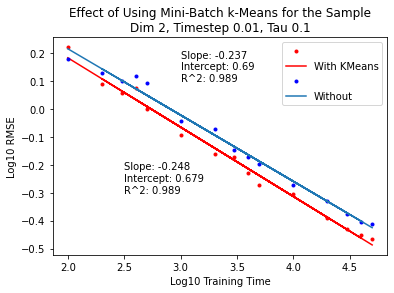

In [1]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
points = []
with open(os.path.join("results", "7-27", "kmeans.csv"), "r") as f:
    reader = csv.reader(f)
    for row in reader:
        points.append([float(row[0]), float(row[-1])])
points = np.array(points)

points = np.log10(points)

from scipy import stats
fig, ax = plt.subplots(facecolor='w')

pointsa = points[0:15]
ax.plot(*zip(*pointsa), 'r.')
slope, intercept, r_value, p_value, std_err = stats.linregress(*zip(*pointsa))
ax.plot(pointsa[:, 0], intercept + slope*pointsa[:, 0], 'r-')
text = "Slope: "+str(round(slope, 3))+"\nIntercept: "+str(round(intercept, 3))+"\nR^2: "+str(round(r_value**2, 3))
ax.text(2.5, -0.3, text)

pointsb = points[15:30]
slope, intercept, r_value, p_value, std_err = stats.linregress(*zip(*pointsb))
ax.plot(*zip(*pointsb), 'b.')
ax.plot(pointsb[:, 0], intercept + slope*pointsb[:, 0], '-')
text = "Slope: "+str(round(slope, 3))+"\nIntercept: "+str(round(intercept, 3))+"\nR^2: "+str(round(r_value**2, 3))
ax.text(3.0, 0.1, text)

ax.set_xlabel("Log10 Training Time")
ax.set_ylabel("Log10 RMSE")
ax.set_title("Effect of Using Mini-Batch k-Means for the Sample\nDim 2, Timestep 0.01, Tau 0.1")

ax.legend(["", "With KMeans", "", "Without"])
plt.show()

Figure 18

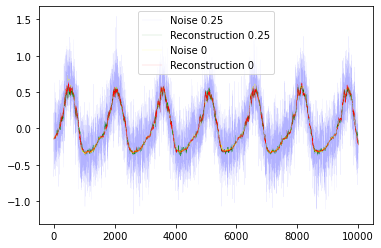

In [22]:
with open('fig18/noisy0.npy', 'rb') as f:
    noisy0 = np.load(f)
with open('fig18/rec0.npy', 'rb') as f:
    rec0 = np.load(f)
with open('fig18/noisy025.npy', 'rb') as f:
    noisy025 = np.load(f)
with open('fig18/rec025.npy', 'rb') as f:
    rec025 = np.load(f)
    
plt.plot(noisy025, alpha=0.3, c="blue", linewidth=0.1)
plt.plot(rec025, c="green", linewidth=0.1)
plt.plot(noisy0, "yellow", linewidth=0.1)
plt.plot(rec0, c="red", linewidth=0.1)
plt.legend(["Noise 0.25", "Reconstruction 0.25", "Noise 0", "Reconstruction 0"])


## Effect of Error Plots

### Large Training Set Size

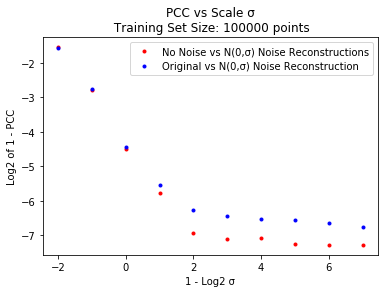

In [2]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os

from scipy import stats
fig, ax = plt.subplots(facecolor='w')

errs = [8*2**(-n) for n in range(10)]
a = [0.6587235488918624, 0.8546197475295694, 0.9559343476386294, 0.9816296550250293, 0.9918646611558168, 0.9927789093702217, 0.9925919349785769, 0.9934694266404586, 0.9935323331910364, 0.9935712553682692]
b = [0.6633817627889479, 0.8528042553360176, 0.9541564588909949, 0.9785856789864434, 0.9869960256418735, 0.9885974684428331, 0.9892316128182943, 0.9894268738864629, 0.990112215676885, 0.9907736875494656]
c = [0.6587235488918624, 0.555668352032949, 0.8363318570794456, 0.947130704557708, 0.9795442639270009, 0.9903896356989794, 0.9927812930130555, 0.9921529663176017, 0.9923933636869264, 0.9941145153105135]


errs = np.array(errs)
a = np.array(a)
b = np.array(b)
c = np.array(c)

a = 1 - a
b = 1 - b
c = 1 - c

base = 2
errs = np.log(errs)/np.log(base)
a = np.log(a)/np.log(base)
b = np.log(b)/np.log(base)
c = np.log(c)/np.log(base)

errs = 1 - errs


ax.plot(errs, a, 'r.')
ax.plot(errs, b, 'b.')

ax.set_xlabel("1 - Log2 σ")
ax.set_ylabel("Log2 of 1 - PCC")
ax.set_title("PCC vs Scale σ\n Training Set Size: 100000 points")

ax.legend(["No Noise vs N(0,σ) Noise Reconstructions", 
           "Original vs N(0,σ) Noise Reconstruction",
          ])
plt.show()

### Small Training Set Size

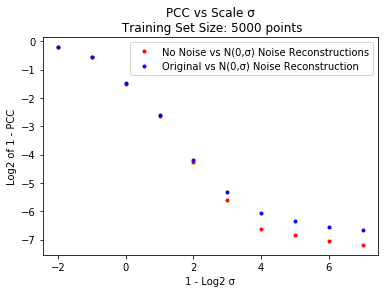

In [3]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os

from scipy import stats
fig, ax = plt.subplots(facecolor='w')

errs = [8*2**(-n) for n in range(10)]
a = [0.1362945545839148, 0.3260893171271245, 0.6518776156528524, 0.8383148886982458, 0.9474631343213742, 0.9796616604022329, 0.9898590238562983, 0.9912524379095993, 0.9925468001255972, 0.9931449453241501]
b = [0.14154641518205213, 0.3229500746120345, 0.6424098455587977, 0.8347406222374067, 0.9455849560349376, 0.9749105121754112, 0.9849342366202116, 0.9877683503717978, 0.9893359207483452, 0.9900900561517141]
c = [0.1362945545839148, 0.015163426662873014, 0.2268723693685188, 0.5508471310762021, 0.7943443150809513, 0.935980093499852, 0.9746863577166871, 0.9883378667647638, 0.9912810529606629, 0.992532699997055]


errs = np.array(errs)
a = np.array(a)
b = np.array(b)
c = np.array(c)

a = 1 - a
b = 1 - b
c = 1 - c

base = 2
errs = np.log(errs)/np.log(base)
a = np.log(a)/np.log(base)
b = np.log(b)/np.log(base)
c = np.log(c)/np.log(base)

errs = 1 - errs

ax.plot(errs, a, 'r.')
ax.plot(errs, b, 'b.')

ax.set_xlabel("1 - Log2 σ")
ax.set_ylabel("Log2 of 1 - PCC")
ax.set_title("PCC vs Scale σ\n Training Set Size: 5000 points")

ax.legend(["No Noise vs N(0,σ) Noise Reconstructions", 
           "Original vs N(0,σ) Noise Reconstruction",
          ])
plt.show()

## Timestep Plots

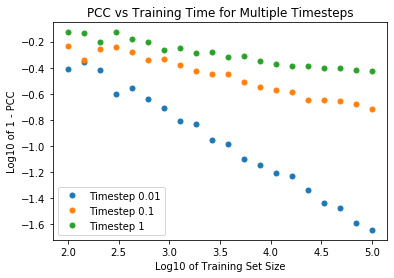

In [4]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os

points = []

with open(os.path.join("results", "8-13", "timstep_diffode.csv"), "r") as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        pt = [np.log10(float(row[7])), # number nonempty
              np.log10(1-float(row[-1])), # pcc
             ]
        points.append(pt)
    
points = np.array(points)

from scipy import stats
fig, ax = plt.subplots(1, 1, facecolor='w'
                      )

ax.plot(*zip(*points[0:20]), '.', markersize=10)
ax.plot(*zip(*points[20:40]), '.', markersize=10)
ax.plot(*zip(*points[40:60]), '.', markersize=10)

ax.set_xlabel("Log10 of Training Set Size")
ax.set_ylabel("Log10 of 1 - PCC")
ax.set_title("PCC vs Training Time for Multiple Timesteps")

plt.legend(["Timestep 0.01", "Timestep 0.1", "Timestep 1"])
plt.show()

## Uniform, Unstructured (+ Interpolation) Comparison

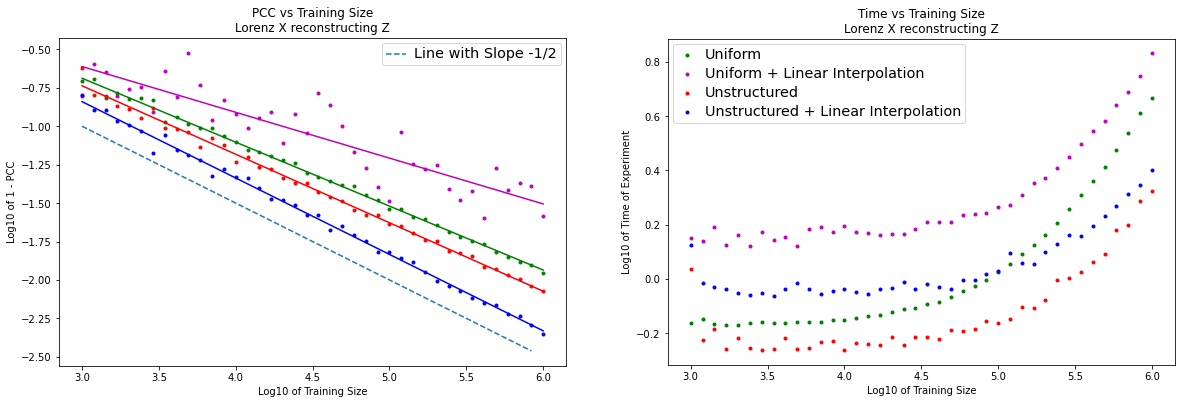

In [71]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os

import pandas as pd

from scipy import stats

points = []
pts2 = []

# scaled-subset-sizes2.csv is a copy of 8-12/scaled-subset-sizes2.csv, but with the optimized unstructured mesh
data = pd.read_csv(os.path.join("results", "8-12", "scaled-subset-sizes.csv")) 

fig, ax = plt.subplots(1, 2, facecolor='w', 
                       figsize=(20, 20)
                      )

# ax.imshow(aspect="auto")

ax[0].plot(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]),
           'g.'
          )
ax[1].plot(np.log10(data["training_size"].values[::2]),
           np.log10(data["time"].values[::2]),
           'g.'
          )

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]))
ax[0].plot(np.log10(data["training_size"].values[::2]), 
           intercept + slope*np.log10(data["training_size"].values[::2]), 
           'g-')







data = pd.read_csv(os.path.join("results", "8-12", "scaled-subset-sizes_but_nn.csv")) 

ax[0].plot(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]),
           'm.'
          )
ax[1].plot(np.log10(data["training_size"].values[::2]),
           np.log10(data["time"].values[::2]),
           'm.'
          )

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]))
ax[0].plot(np.log10(data["training_size"].values[::2]), 
           intercept + slope*np.log10(data["training_size"].values[::2]), 
           'm-')










data = pd.read_csv(os.path.join("results", "8-14", "scaled-subset-sizes-add11.csv")) 
ax[0].plot(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values),
           'r.'
          )
ax[1].plot(np.log10(data["training_size"].values),
           np.log10(data["time"].values),
           'r.'
          )
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values))
ax[0].plot(np.log10(data["training_size"].values), 
           intercept + slope*np.log10(data["training_size"].values), 
           'r-')

data = pd.read_csv(os.path.join("results", "8-14", "scaled-subset-sizes-add2.csv")) 
ax[0].plot(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values),
           'b.'
          )
ax[1].plot(np.log10(data["training_size"].values),
           np.log10(data["time"].values),
           'b.'
          )
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values))
ax[0].plot(np.log10(data["training_size"].values), 
           intercept + slope*np.log10(data["training_size"].values), 
           'b-')



x = np.log10(data["training_size"].values[::2])
y = -0.5*x+0.5
ax[0].plot(x,y,'--',label="Line with Slope -1/2")




ax[0].set_xlabel("Log10 of Training Size")
ax[0].set_ylabel("Log10 of 1 - PCC")
ax[0].set_title("PCC vs Training Size\nLorenz X reconstructing Z")

ax[1].set_xlabel("Log10 of Training Size")
ax[1].set_ylabel("Log10 of Time of Experiment")
ax[1].set_title("Time vs Training Size\nLorenz X reconstructing Z")

ax[0].set(adjustable='box', aspect='equal')
ax[1].set(adjustable='box', aspect='equal')

asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp+0.22)

leg1 = ax[1].legend(["Uniform", "Uniform + Linear Interpolation", "Unstructured", "Unstructured + Linear Interpolation","Line with Slope -1/2"])
leg0 = ax[0].legend(loc='upper right')


leg0.get_texts()[0].set_fontsize('x-large')
leg1.get_texts()[0].set_fontsize('x-large')
leg1.get_texts()[1].set_fontsize('x-large')
leg1.get_texts()[2].set_fontsize('x-large')
leg1.get_texts()[3].set_fontsize('x-large')


plt.show()

In [20]:
slope

-0.4969512959669347

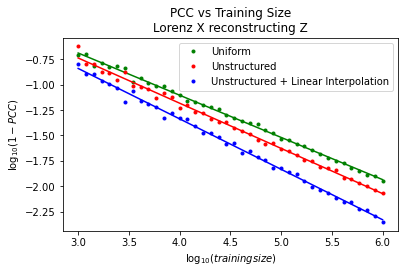

In [2]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os

import pandas as pd

from scipy import stats

points = []
pts2 = []

# scaled-subset-sizes2.csv is a copy of 8-12/scaled-subset-sizes2.csv, but with the optimized unstructured mesh
data = pd.read_csv(os.path.join("results", "8-12", "scaled-subset-sizes.csv")) 

# fig, ax = plt.subplots(1, 2, facecolor='w', figsize=(15, 15)
#                       )
fig, ax = plt.subplots(facecolor='w')

ax.plot(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]),
           'g.',
        label="Uniform"
          )
# ax[1].plot(np.log10(data["training_size"].values[::2]),
#            np.log10(data["time"].values[::2]),
#            'g.'
#           )

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values[::2]),
           np.log10(1 - data["pcc"].values[::2]))
ax.plot(np.log10(data["training_size"].values[::2]), 
           intercept + slope*np.log10(data["training_size"].values[::2]), 
           'g-')

data = pd.read_csv(os.path.join("results", "8-14", "scaled-subset-sizes-add11.csv")) 
ax.plot(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values),
           'r.',
        label="Unstructured"
          )
# ax[1].plot(np.log10(data["training_size"].values),
#            np.log10(data["time"].values),
#            'r.'
#           )
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values))
ax.plot(np.log10(data["training_size"].values), 
           intercept + slope*np.log10(data["training_size"].values), 
           'r-')

data = pd.read_csv(os.path.join("results", "8-14", "scaled-subset-sizes-add2.csv")) 
ax.plot(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values),
           'b.',
        label="Unstructured + Linear Interpolation"
          )
# ax[1].plot(np.log10(data["training_size"].values),
#            np.log10(data["time"].values),
#            'b.'
#           )
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(data["training_size"].values),
           np.log10(1 - data["pcc"].values))
ax.plot(np.log10(data["training_size"].values), 
           intercept + slope*np.log10(data["training_size"].values), 
           'b-')

ax.set_xlabel("$\log_{10}(training size)$")
ax.set_ylabel("$\log_{10}(1 - PCC)$")
ax.set_title("PCC vs Training Size\nLorenz X reconstructing Z")

# ax[1].set_xlabel("Log10 of Training Size")
# ax[1].set_ylabel("Log10 of Time of Experiment")
# ax[1].set_title("Time vs Training Size\nLorenz X reconstructing Z")

ax.set(adjustable='box', aspect='equal')
# ax[1].set(adjustable='box', aspect='equal')

ax.legend()
plt.show()

## Histogram Plots

1000000.0 1000000


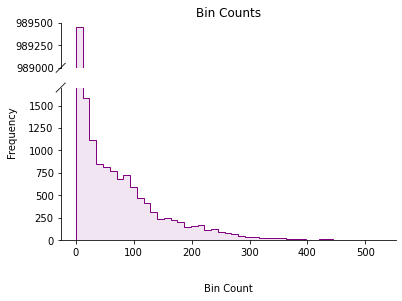

In [3]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import scipy.stats as stats  
from brokenaxes import brokenaxes

fig = plt.figure(facecolor='w')
ax = brokenaxes(
                #xlims=(0.0, 200.0),
                ylims=((0, 1700), (989000, 989500)),
#                 yscale='log'
               )
# ax = brokenaxes(
#     xlims=((0.0, 200.0), (350.0, 400.0)), 
#                 ylims=((0, 1500), (3500, 4000)),
#                )

bin_counts1 = list(np.loadtxt(os.path.join("bcu.txt")))
for i in range(985835):
    bin_counts1.append(0)
print(sum([i for i in bin_counts1]), len(bin_counts1))
# bin_counts1 = [c for c in bin_counts1 if c > 0]
ax.hist(bin_counts1, 45, alpha=0.1, color="purple")
ax.hist(bin_counts1, 45, color="purple", histtype='step')

# bin_counts2 = np.loadtxt(os.path.join("bcv.txt"))
# print(sum([i for i in bin_counts2]), len(bin_counts2))
# bin_counts2 = [c for c in bin_counts2 if c > 0]
# ax.hist(bin_counts2, 45, alpha=0.3, label="Unstructured Mesh", color='orange')


# fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts2)
# x = range(0, 3000)
# ax.plot(x, 85000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='orange')


# bin_counts3 = np.loadtxt(os.path.join("bck.txt"))
# print(sum([i for i in bin_counts3]), len(bin_counts3))
# ax.hist(bin_counts3, 45, alpha=0.3, label="Unstructured + $k$-means", color='green')


# fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts3)
# x = range(0, 3000)
# ax.plot(x, 65000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='green')


ax.set_xlabel("Bin Count")
ax.set_ylabel("Frequency", labelpad=40)
ax.set_title("Bin Counts")



# ax.legend()

plt.show()




# import csv
# %matplotlib inline
# from matplotlib import pyplot as plt
# import numpy as np
# import os
# points = []

# bin_counts = np.loadtxt(os.path.join("results", "7-24", "bin_counts_uniform_100mil.txt"))

# print(sum([i for i in bin_counts]))

# # for uniform
# bin_counts = [c for c in bin_counts if c > 0]

# import scipy.stats as stats  
# fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts)
# print(fit_alpha, fit_loc, fit_beta)
# fig, ax = plt.subplots(facecolor='w')
# x = range(0, 50000)
# # ax.plot(x, 8000000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta))
# ax.hist(bin_counts, 40)
# ax.set_xlabel("Bin Count")
# ax.set_ylabel("Frequency")
# ax.set_title("Uniform Mesh Bin Counts\nHistogram")
# # text = "alpha: "+str(round(slope, 3))+"\nIntercept: "+str(round(intercept, 3))+"\nR^2: "+str(round(r_value**2, 3))
# # ax.text(4.0, 0.9, text)
# plt.show()

In [67]:
np.min(bin_counts1)

1.0

1000000.0 14165
1000000.0 14165
1000000.0 14165


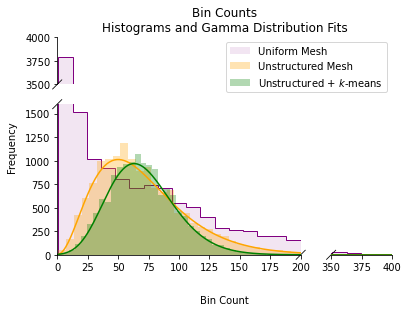

In [63]:
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import scipy.stats as stats  
from brokenaxes import brokenaxes

fig = plt.figure(
    facecolor='w')
ax = brokenaxes(
    xlims=((0.0, 200.0), (350.0, 400.0)), 
                ylims=((0, 1600), (3500, 4000)),
               )

bin_counts1 = np.loadtxt(os.path.join("bcu.txt"))
print(sum([i for i in bin_counts1]), len(bin_counts1))
bin_counts1 = [c for c in bin_counts1 if c > 0]
ax.hist(bin_counts1, 45, alpha=0.1, label="Uniform Mesh", color="purple")
ax.hist(bin_counts1, 45, color="purple", histtype='step')

bin_counts2 = np.loadtxt(os.path.join("bcv.txt"))
print(sum([i for i in bin_counts2]), len(bin_counts2))
bin_counts2 = [c for c in bin_counts2 if c > 0]
ax.hist(bin_counts2, 45, alpha=0.3, label="Unstructured Mesh", color='orange')


fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts2)
x = range(0, 3000)
ax.plot(x, 85000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='orange')


bin_counts3 = np.loadtxt(os.path.join("bck.txt"))
print(sum([i for i in bin_counts3]), len(bin_counts3))
ax.hist(bin_counts3, 45, alpha=0.3, label="Unstructured + $k$-means", color='green')


fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts3)
x = range(0, 3000)
ax.plot(x, 65000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='green')


ax.set_xlabel("Bin Count", labelpad=10)
ax.set_ylabel("Frequency", labelpad=40)
ax.set_title("Bin Counts\nHistograms and Gamma Distribution Fits")



ax.legend()

plt.show()

In [54]:
# import csv
# %matplotlib inline
# from matplotlib import pyplot as plt
# import numpy as np
# import os
# import scipy.stats as stats  
# from brokenaxes import brokenaxes

# fig = plt.figure(
#     facecolor='w')
# ax = brokenaxes(
#     xlims=((0.0, 3000.0), (4500.0, 5000.0)), 
#                 ylims=((0, 1250), (3000, 3400)),
#                )

# bin_counts2 = np.loadtxt(os.path.join("results", "8-18", "bincu.txt"))
# print(sum([i for i in bin_counts2]))
# print(len(bin_counts2))
# bin_counts2 = [c for c in bin_counts2 if c > 0]
# ax.hist(bin_counts2, 45, alpha=0.1, label="Uniform Mesh", color="purple")
# ax.hist(bin_counts2, 45, color="purple", histtype='step')

# bin_counts3 = np.loadtxt(os.path.join("results", "8-18", "bincv.txt"))
# print(sum([i for i in bin_counts3]), len(bin_counts3))
# print(len(bin_counts3))

# bin_counts3 = [c for c in bin_counts3 if c > 0]
# ax.hist(bin_counts3, 45, alpha=0.3, label="Unstructured Mesh", color='orange')


# fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts3)
# x = range(0, 3000)
# ax.plot(x, 900000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='orange')


# bin_counts = np.loadtxt(os.path.join("results", "8-18", "bincvk.txt"))
# print(sum([i for i in bin_counts]), len(bin_counts))
# print(len(bin_counts))

# ax.hist(bin_counts, 45, alpha=0.3, label="Unstructured + $k$-means", color='green')


# fit_alpha, fit_loc, fit_beta=stats.gamma.fit(bin_counts)
# x = range(0, 3000)
# ax.plot(x, 750000*stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta), color='green')


# ax.set_xlabel("Bin Count")
# ax.set_ylabel("Frequency")
# ax.set_title("Bin Counts\nHistograms and Gamma Distribution Fits")

# ax.legend()

# plt.show()

## Subset Optimization Plots

Note that this works for uniform mesh with some minor changes like using epsilon instead of subset_sizes.

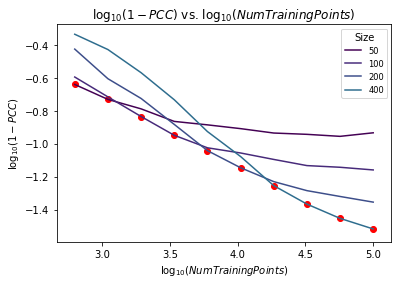

slope: 1.5864393267281132
intercept: 1.256948401444646


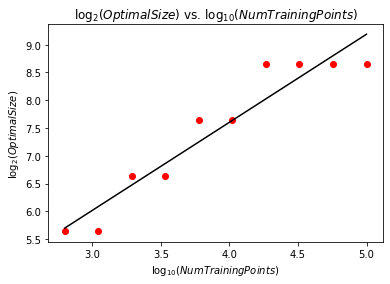

In [7]:
# This file creates fixed subset size plots and predicts the optimal relationship between amount of training data and subset size.
import pandas as pd #used to read in the data file
import numpy as np #used to compute trial averages and logs of data
from scipy import stats #used to compute regression line for the optimal subset size and training time relationship
import matplotlib.pyplot as plt #used for plotting and visualization of minimal error points

import os 
data = pd.read_csv(os.path.join("results", "8-18", "subsetplots4.csv")) 

# data = pandas.read_csv('results.csv') #reads the data file 'results.csv'

#determines the number of data points used for training in each experiment and comuptes the logarithm of that list
numtrainingpoints = data.training_size.tolist()
numtrainingpoints = [int(i) for i in numtrainingpoints]
numtrainingpoints = np.log10(numtrainingpoints)


#reads in the list of PCC values from each experiment
error1 = data.pcc.tolist()
error1 = [float(i) for i in error1]

#computes averages of successive elements in error1 so that a unique data point can be associated to each combination of subset size and amount of training data that was tested.
average = 10 #must be the value of the number of experiments run for each combination of subset size and amount of training data.
numaverages = len(error1)//average 
error = []
for i in range(numaverages):
    loweridx = int(i*average) 
    upperidx = int((i+1)*average)
    error.append(np.average(error1[loweridx:upperidx]))

#turns list of averaged PCC values into a list of log(1-PCC) values
error = [1-float(i) for i in error]
error = np.log10(error)
error = error.tolist()

#reads in the subset sizes that were tested
subset_size = data.subset_size.tolist()
subset_size = [float(i) for i in subset_size]

#creates a list of unique training times that were tested
times = []
for i in numtrainingpoints:
    if i not in times:
        times.append(i)
        
#creates a list of unique subset sizes that were tested
sizes = []
for i in subset_size:
    if i not in sizes:
        sizes.append(i)
        
div = len(times) #number of unique training sizes tested
splits = len(set(subset_size)) #number of unique subset sizes tested

#formats axis titles and color theme
fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('$\log_{10}(1-PCC)$ vs. $\log_{10}(NumTrainingPoints)$')
ax.set_xlabel('$\log_{10}(NumTrainingPoints)$')
ax.set_ylabel('$\log_{10}(1-PCC)$')
theme = plt.get_cmap('viridis')

# plots the fixed subset error curves and appends to the list 'lines' the list of errors associated with each subset size
lines = [] 
for i in range(0,splits):
    subseterrors = error[div*(i):div*(i+1)] #the errors associated with each subset size
    ax.plot(times,subseterrors,label = int(sizes[i]), color=theme(30*i))
    lines.append(subseterrors)
legend = plt.legend(title="Size",loc=0, fontsize='small', fancybox=True)

#identifies the minimal error points for each training size and computes the log of each optimal subset sizes
tests = []
mins = []
minsizes = []
for i in range(div):
    for j in lines:
        tests.append(j[i]) #list of errors associated with each training size
    mins.append(np.min(tests)) #minimal error for each training size
    arg = np.argmin(tests) #argument of subset size associated with minimal error point
    minsizes.append(np.log2(sizes[arg])) #compute log of optimal subset size
    tests = []

#identify minimal error points on the fixed subset error curve plot
plt.scatter(times,mins, color = 'r') 
plt.show()

#plot relationship between the log of the optimal subset size and the log of the amount of training data
x = np.arange(min(times),max(times),.1)
slope, intercept, r_value, p_value, std_err = stats.linregress(times,minsizes)
plt.scatter(times,minsizes,color = 'r')
plt.plot(x, intercept + slope*x,color = 'k')
plt.title('$\log_2(OptimalSize)$ vs. $\log_{10}(NumTrainingPoints)$' )
plt.xlabel('$\log_{10}(NumTrainingPoints)$')
plt.ylabel('$\log_2(OptimalSize)$')
print('slope:',slope)
print('intercept:', intercept)
